**Financials–Leonard:**<br>
This is a module to grab the stock prices for different sectors for days below. This script will calculate 7, 50, and 200 day rolling averages, as well as when golden crosses (short average rises above long) and death crosses (short falls below long) occur. The output is the beginning of a large dataframe to model and predict stock increase based on the data shown.

In [1]:
import yahoo_finance as yf
import datetime as df
from yahoo_finance import Share
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

In [2]:
#loads yahoo-finance data on share described
share=Share('ANIK')

In [3]:
#creates dataframe, testf, that contains the historical data. This frame is indexed by day.
test = share.get_historical('2009-01-01','2016-11-14')
testf=pd.DataFrame(test)
testf=testf.set_index(testf['Date'])
testf.index.name=None

#Adds new columns to the dataframe, begin and end, that are datetimes for open and close
testf['Begin'] = pd.to_datetime(testf['Date'].astype(str) + ' 09:30')
testf['End'] = pd.to_datetime(testf['Date'].astype(str) + ' 16:00')
testf=testf.sort_index()
testf

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,Begin,End
2009-01-02,3.12,3.12,2009-01-02,3.12,2.96,3.07,ANIK,53300,2009-01-02 09:30:00,2009-01-02 16:00:00
2009-01-05,3.49,3.49,2009-01-05,3.50,3.14,3.15,ANIK,108000,2009-01-05 09:30:00,2009-01-05 16:00:00
2009-01-06,4.19,4.19,2009-01-06,4.20,3.54,3.58,ANIK,119000,2009-01-06 09:30:00,2009-01-06 16:00:00
2009-01-07,3.77,3.77,2009-01-07,4.31,3.75,4.23,ANIK,85200,2009-01-07 09:30:00,2009-01-07 16:00:00
2009-01-08,4.65,4.65,2009-01-08,4.70,4.00,4.25,ANIK,128400,2009-01-08 09:30:00,2009-01-08 16:00:00
2009-01-09,4.78,4.78,2009-01-09,4.90,4.71,4.74,ANIK,72400,2009-01-09 09:30:00,2009-01-09 16:00:00
2009-01-12,4.71,4.71,2009-01-12,4.95,4.60,4.85,ANIK,62100,2009-01-12 09:30:00,2009-01-12 16:00:00
2009-01-13,4.77,4.77,2009-01-13,5.20,4.65,4.65,ANIK,59500,2009-01-13 09:30:00,2009-01-13 16:00:00
2009-01-14,4.52,4.52,2009-01-14,4.70,4.45,4.68,ANIK,20500,2009-01-14 09:30:00,2009-01-14 16:00:00
2009-01-15,4.75,4.75,2009-01-15,4.75,4.16,4.46,ANIK,54600,2009-01-15 09:30:00,2009-01-15 16:00:00


In [4]:
#makes a new dataframe using the open time as an index, and open price as the price
start=pd.DataFrame(testf['Open'])
start.columns=(['Price'])
start=start.set_index(testf['Begin'])
start.index.name=None

#makes a new dataframe using the close time as an index, and closing price as the price
end=pd.DataFrame(testf['Close'])
end.columns=(['Price'])
end=end.set_index(testf['End'])
end.index.name=None

#concatenates and sorts these dataframes to create 2x/day price dataframe
grand=pd.concat([start,end])
grand=grand.sort_index()

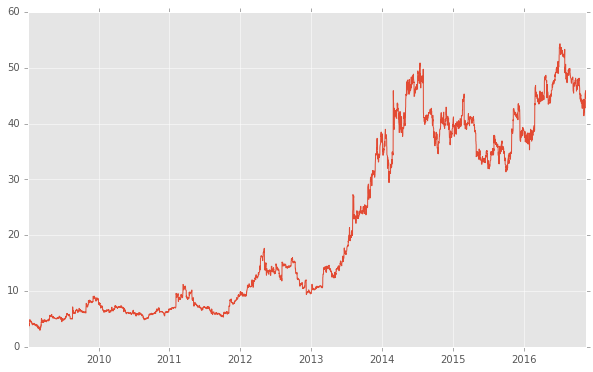

In [5]:
#plots the price over time
plt.plot(grand['Price'])
plt.show()

In [6]:
#calulate rolling averages (7 day)
grand['7']=grand['Price'].rolling('7d').mean()
#calculate rolling averages (50 day)
grand['50']=grand['Price'].rolling('50d').mean()
#calculate rolling averages (200 day)
grand['200']=grand['Price'].rolling('200d').mean()
grand

,Price,7,50,200
2009-01-02 09:30:00,3.07,3.070000,3.070000,3.070000
2009-01-02 16:00:00,3.12,3.095000,3.095000,3.095000
2009-01-05 09:30:00,3.15,3.113333,3.113333,3.113333
2009-01-05 16:00:00,3.49,3.207500,3.207500,3.207500
2009-01-06 09:30:00,3.58,3.282000,3.282000,3.282000
2009-01-06 16:00:00,4.19,3.433333,3.433333,3.433333
2009-01-07 09:30:00,4.23,3.547143,3.547143,3.547143
2009-01-07 16:00:00,3.77,3.575000,3.575000,3.575000
2009-01-08 09:30:00,4.25,3.650000,3.650000,3.650000
2009-01-08 16:00:00,4.65,3.750000,3.750000,3.750000


In [7]:
#creates new columns where data is shifted by one position
grand['7shift']=grand['7'].shift(1)
grand['50shift']=grand['50'].shift(1)
grand['200shift']=grand['200'].shift(1)

#functions to be applied to dataframe, compare n and n-1 states for golden cross
def golden750_cross(row):
    if ((row['7'] >= row['50']) & (row['7shift'] <= row['50shift'])):
        return 1
    else:
        return 0

def golden50200_cross(row):
    if ((row['50'] >= row['200']) & (row['50shift'] <= row['200shift'])):
        return 1
    else:
        return 0
    
def golden7200_cross(row):
    if ((row['7'] >= row['200']) & (row['7shift'] <= row['200shift'])):
        return 1
    else:
        return 0
    
#creates new classfied columns in dataframe, 1 for days where golden crosses occur
grand['750gc']=grand.apply(golden750_cross,axis=1)
grand['50200gc']=grand.apply(golden50200_cross,axis=1)
grand['7200gc']=grand.apply(golden7200_cross,axis=1)


In [8]:
#functions to be applied to dataframe, compare n and n-1 states for golden cross
def golden750_cross(row):
    if ((row['7'] <= row['50']) & (row['7shift'] >= row['50shift'])):
        return 1
    else:
        return 0

def golden50200_cross(row):
    if ((row['50'] <= row['200']) & (row['50shift'] >= row['200shift'])):
        return 1
    else:
        return 0
    
def golden7200_cross(row):
    if ((row['7'] <= row['200']) & (row['7shift'] >= row['200shift'])):
        return 1
    else:
        return 0
    
#creates new binary columns in dataframe, 1 for days where death crosses occur    
grand['750dc']=grand.apply(golden750_cross,axis=1)
grand['50200dc']=grand.apply(golden50200_cross,axis=1)
grand['7200dc']=grand.apply(golden7200_cross,axis=1)


In [9]:
#for each row, calculates the days elapsed since the last golden cross (each window size)
last = 0
def elapsed750(row):
    if row['750gc'] == 0:
        return int(grand.index.get_loc(row.name) - last) / 2
    else:
        global last
        last = grand.index.get_loc(row.name)
        return int(grand.index.get_loc(row.name) - last) / 2
    
#750 crossover elapsed
def elapsed50200(row):
    if row['50200gc'] == 0:
        return int(grand.index.get_loc(row.name) - last) / 2
    else:
        global last
        last = grand.index.get_loc(row.name)
        return int(grand.index.get_loc(row.name) - last) / 2
    
def elapsed7200(row):
    if row['7200gc'] == 0:
        return int(grand.index.get_loc(row.name) - last) / 2
    else:
        global last
        last = grand.index.get_loc(row.name)
        return int(grand.index.get_loc(row.name) - last) / 2

<ipython-input-9-8f67266d2a48>:7: SyntaxWarning: name 'last' is used prior to global declaration
  global last
<ipython-input-9-8f67266d2a48>:16: SyntaxWarning: name 'last' is used prior to global declaration
  global last
<ipython-input-9-8f67266d2a48>:24: SyntaxWarning: name 'last' is used prior to global declaration
  global last


In [10]:
#applies golden cross counting to dataframe
last=0
grand['750g'] = grand.apply(elapsed750,axis=1)

last=0
grand['50200g'] = grand.apply(elapsed50200,axis=1)

last=0
grand['7200g'] = grand.apply(elapsed7200,axis=1)

In [11]:
#for each row, calculates the days elapsed since the last death cross (each window size)
last = 0
def death750(row):
    if row['750dc'] == 0:
        return int(grand.index.get_loc(row.name) - last) / 2
    else:
        global last
        last = grand.index.get_loc(row.name)
        return int(grand.index.get_loc(row.name) - last) / 2
    
#750 crossover elapsed
def death50200(row):
    if row['50200dc'] == 0:
        return int(grand.index.get_loc(row.name) - last) / 2
    else:
        global last
        last = grand.index.get_loc(row.name)
        return int(grand.index.get_loc(row.name) - last) / 2
    
def death7200(row):
    if row['7200dc'] == 0:
        return int(grand.index.get_loc(row.name) - last) / 2
    else:
        global last
        last = grand.index.get_loc(row.name)
        return int(grand.index.get_loc(row.name) - last) / 22

<ipython-input-11-66ea00c63958>:7: SyntaxWarning: name 'last' is used prior to global declaration
  global last
<ipython-input-11-66ea00c63958>:16: SyntaxWarning: name 'last' is used prior to global declaration
  global last
<ipython-input-11-66ea00c63958>:24: SyntaxWarning: name 'last' is used prior to global declaration
  global last


In [12]:
#applies death cross counting to dataframe
last=0
grand['750d'] = grand.apply(death750,axis=1)

last=0
grand['50200d'] = grand.apply(death50200,axis=1)

last=0
grand['7200d'] = grand.apply(death7200,axis=1)

In [14]:
#creates dataframe with raw data removed, writes this to a csv
final=grand[['Price','7','50','200','750g','50200g','7200g','750d','50200d','7200d']]
final.to_csv('20161114_ANIK.csv')

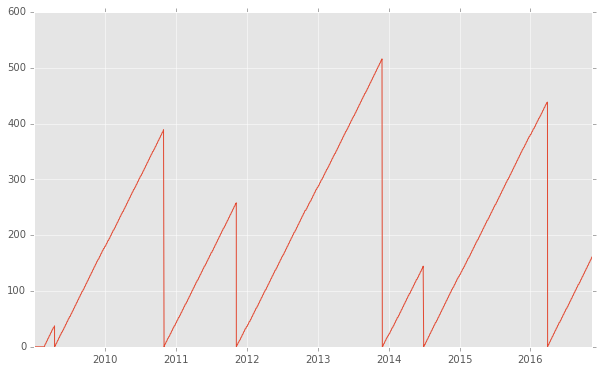

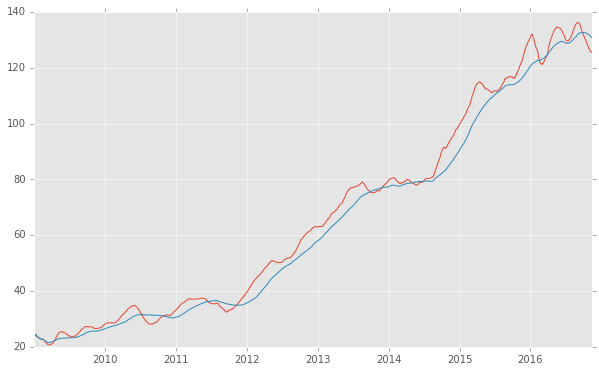

In [14]:
#experimental plots to confirm analysis is correct
plt.plot(final['50200g'])
plt.show()

plt.plot(final[['50','200']])
plt.show()